In [1]:
# Step 0: Libraries
import pandas as pd  # handling and manipulating tabular data
import numpy as np  # numerical computations
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization

# building, evaluating, and validating machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 0: Load the dataset
df = pd.read_csv('merged_data.csv', low_memory=False)
print("\nDataset loaded successfully!")


Dataset loaded successfully!


In [2]:
# Step 1: Explore the data
print("\nDataset Overview:")
print(df.head())  # Display the first few rows
print("\nDataset Info:")
print(df.info())  # Show data types, column names, data types, and non-null counts
print("\nBasic Statistics:")
print(df.describe())  # Summarize numeric columns (mean, median, min, max, etc.)


Dataset Overview:
      X     Y     Z       EDA     HR   TEMP  id  \
0 -13.0 -61.0   5.0  6.769995  99.43  31.17  15   
1 -20.0 -69.0  -3.0  6.769995  99.43  31.17  15   
2 -31.0 -78.0 -15.0  6.769995  99.43  31.17  15   
3 -47.0 -65.0 -38.0  6.769995  99.43  31.17  15   
4 -67.0 -57.0 -53.0  6.769995  99.43  31.17  15   

                        datetime  label  
0  2020-07-08 14:03:00.000000000    2.0  
1  2020-07-08 14:03:00.031249920    2.0  
2  2020-07-08 14:03:00.062500096    2.0  
3  2020-07-08 14:03:00.093750016    2.0  
4  2020-07-08 14:03:00.124999936    2.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usa

In [3]:
# Step 2: Check for duplicates and handle them
print("\nChecking for duplicates...")
duplicate_count = df.duplicated().sum() # Detects duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df = df.drop_duplicates() # Removes duplicates
    print("Duplicates removed.")


Checking for duplicates...
Number of duplicate rows: 105606
Duplicates removed.


In [4]:
# Step 3: Check for missing values and handle them
print("Missing Values Per Column:\n")
print(df.isnull().sum())

# Handle missing values for numeric columns only
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print("Missing values in numeric columns handled.")


Missing Values Per Column:

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64
Missing values in numeric columns handled.



Visualizing the distribution of numeric columns...


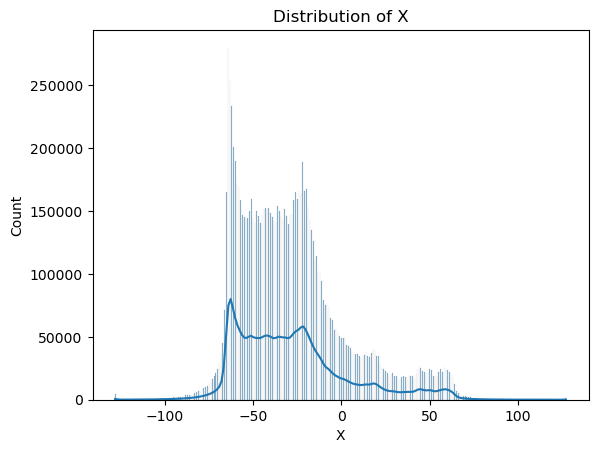

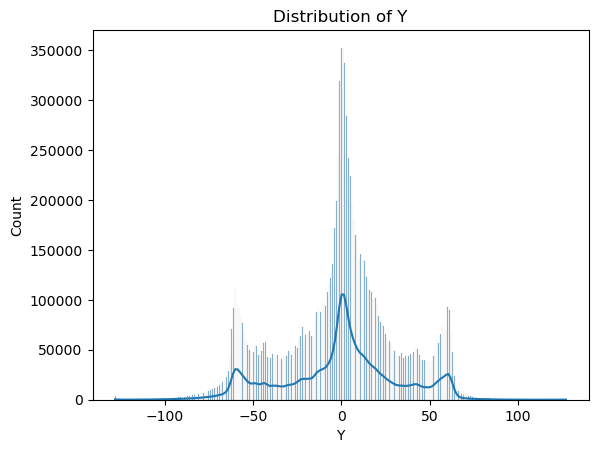

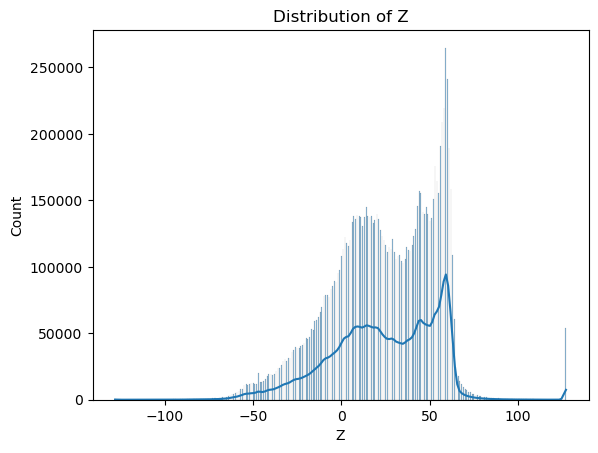

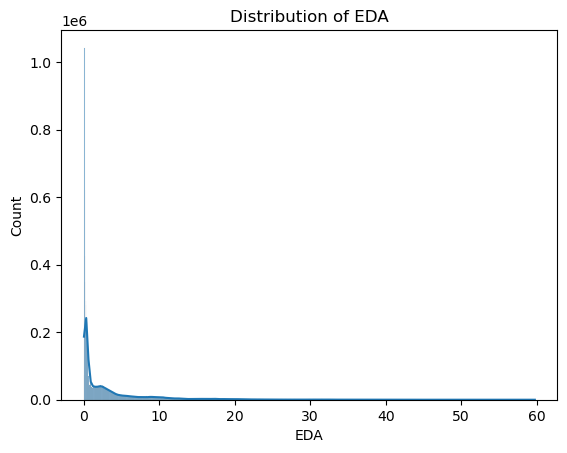

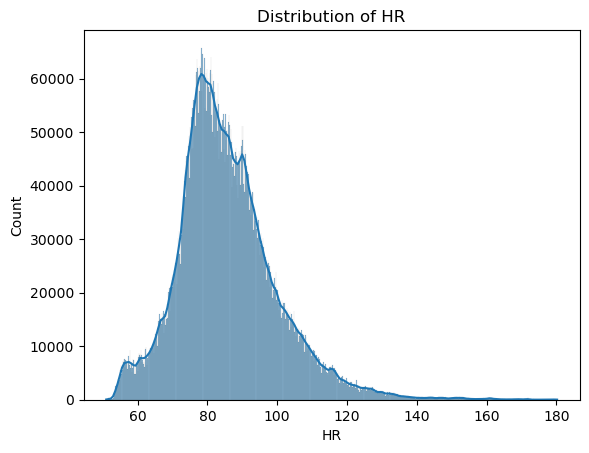

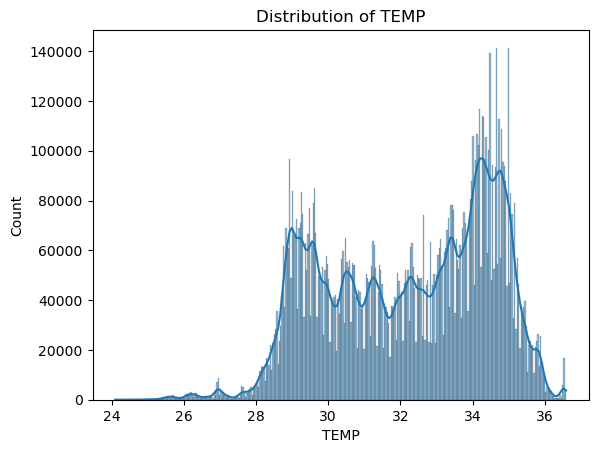

In [5]:
# Step 4: Data exploration and visualization
print("\nVisualizing the distribution of numeric columns...")
numeric_columns = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']
for column in numeric_columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


Class Distribution in 'label':
label
2.0    8467619
0.0    2162245
1.0     773581
Name: count, dtype: int64


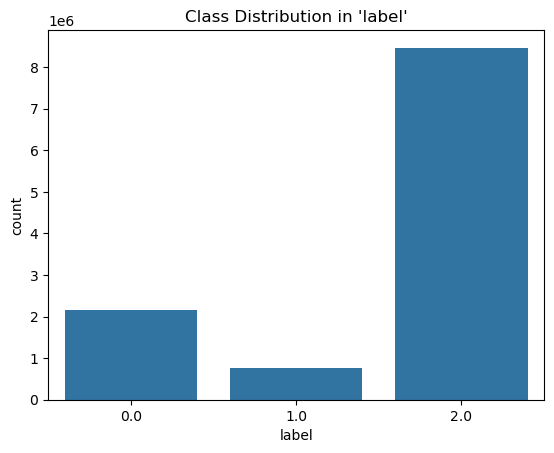

In [6]:
# Step 5: Explore class distribution
if 'label' in df.columns:
    print("\nClass Distribution in 'label':")
    print(df['label'].value_counts())
    sns.countplot(x='label', data=df)
    plt.title("Class Distribution in 'label'")
    plt.show()

In [7]:
# Step 6: Process the 'id' column
if 'id' in df.columns:
    try:
        df['id'] = pd.to_numeric(df['id'], errors='coerce')  # Convert to numeric, set invalid values to NaN
        print("\nProcessed 'id' column.")
    except Exception as e:
        print("Error processing 'id' column:", e)


Processed 'id' column.


In [8]:
# Step 7: Convert 'datetime' to proper datetime format
if 'datetime' in df.columns:
    try:
        df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
        print("\nProcessed 'datetime' column.")
    except Exception as e:
        print("Error processing 'datetime' column:", e)


Processed 'datetime' column.


In [9]:
# Step 8: Scale numeric columns (if necessary)
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print("\nScaled numeric columns.")


Scaled numeric columns.


In [10]:
# Step 9: Prepare dataset for training
# Drop unnecessary columns
columns_to_drop = ['datetime', 'id'] if 'datetime' in df.columns and 'id' in df.columns else []
df = df.drop(columns=columns_to_drop)

# Define features (X) and target (y)
X = df.drop(columns=['label'])
y = df['label']

In [11]:
# Step 10: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print("\nData split into training and testing sets.")


Data split into training and testing sets.


In [12]:
# Step 11: Train a simple model
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
print("\nModel trained successfully!")


Model trained successfully!


In [13]:
# Step 12: Evaluate model performance
y_pred = rf_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   1081387
         1.0       1.00      0.97      0.98    386229
         2.0       0.99      1.00      1.00   4234107

    accuracy                           0.99   5701723
   macro avg       1.00      0.98      0.99   5701723
weighted avg       0.99      0.99      0.99   5701723

Confusion Matrix:
 [[1065513     378   15496]
 [    863  374422   10944]
 [   3302     975 4229830]]
Accuracy Score: 0.99


In [14]:
# Step 12: Evaluate model performance in 100%
# Generate predictions
y_pred = rf_model.predict(X_test)

# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Print the classification report with percentages
print("\nClassification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):  # Exclude 'accuracy', 'macro avg', etc.
        print(f"Class {label}:")
        for metric, value in metrics.items():
            print(f"  {metric.capitalize()}: {value * 100:.2f}%")
    else:
        print(f"{label.capitalize()}: {metrics * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Accuracy Score as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy Score: {accuracy:.2f}%")



Classification Report:
Class 0.0:
  Precision: 99.61%
  Recall: 98.53%
  F1-score: 99.07%
  Support: 108138700.00%
Class 1.0:
  Precision: 99.64%
  Recall: 96.94%
  F1-score: 98.27%
  Support: 38622900.00%
Class 2.0:
  Precision: 99.38%
  Recall: 99.90%
  F1-score: 99.64%
  Support: 423410700.00%
Accuracy: 99.44%
Class macro avg:
  Precision: 99.54%
  Recall: 98.46%
  F1-score: 98.99%
  Support: 570172300.00%
Class weighted avg:
  Precision: 99.44%
  Recall: 99.44%
  F1-score: 99.44%
  Support: 570172300.00%

Confusion Matrix:
 [[1065513     378   15496]
 [    863  374422   10944]
 [   3302     975 4229830]]
Accuracy Score: 99.44%
